# Assignment 1: Building Neural Networks for Image Classification

## Overview
Welcome back to Assignment 1! In this assignment, you'll dive into the fascinating realm of deep learning by building and training neural networks for image classification and object detection tasks using the PyTorch framework. You'll work with two popular datasets: MNIST for image classification and CIFAR-100 for object detection. Throughout the assignment, you'll also fine-tune your models to achieve optimal results.

## Part 3: Achieve Best Accuracy
In the final section of the assignment, you'll take your models to the next level by modifying the model and achieving benchmark performance. You'll experiment with different architectures, hyperparameters, learning rates, and optimization techniques to achieve the best possible accuracy for object classification (CIFAR-100). Your journey will involve analyzing the impact of these changes on the models' accuracy and convergence. Feel free to write your own modules, and make changes to starter code to achieve highest possible accuracy. Results are expected to be submitted in the same format as previous sections however.

For your reference, here are the benchmark standards achieved by state of the art classifiers:
https://paperswithcode.com/sota/image-classification-on-cifar-100

Note: You can implement one of the AlexNet, ResNet18, ResNet50, etc. architectures discussed in class. However, \textbf{No transfer learning or pretrained models allowed.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Specify font family to avoid font warnings on Colab
plt.rcParams['font.family'] = 'DejaVu Sans'

cuda


In [2]:
from data import get_dataloaders
import neural_network
import trainer
import visualize

In [3]:
# Hyperparameters
# TODO: Experiment with different hyperparameters
batch_size = 400
learning_rate = 0.002
epochs = 25

In [4]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.ColorJitter(contrast=2.0),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

trainloader, testloader = get_dataloaders(
    dataset_name="cifar100", 
    batch_size=batch_size, 
    train_transforms=transform_train, 
    test_transforms=transform_test
)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# TODO: Initialize the model, loss function, and optimizer
model = neural_network.BetterModel()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.9, weight_decay=5e-4)

In [6]:
# TODO: Training loop
train_losses, test_losses = trainer.train(model, optimizer, criterion, trainloader, testloader, epochs, device)

Epoch 1/25 - Train Loss: 4.0978336353302005
Epoch 1/25 - Test Loss: 3.7628668975830077
Epoch 1/25 - Test Accuracy: 11.44%
Checkpoint saved for epoch 1
Epoch 2/25 - Train Loss: 3.530212703704834
Epoch 2/25 - Test Loss: 3.3321910190582273
Epoch 2/25 - Test Accuracy: 18.88%
Epoch 3/25 - Train Loss: 3.1578783874511718
Epoch 3/25 - Test Loss: 3.0799437141418458
Epoch 3/25 - Test Accuracy: 24.36%
Epoch 4/25 - Train Loss: 2.8538097190856933
Epoch 4/25 - Test Loss: 2.927151737213135
Epoch 4/25 - Test Accuracy: 27.32%
Epoch 5/25 - Train Loss: 2.544723503112793
Epoch 5/25 - Test Loss: 2.6288228034973145
Epoch 5/25 - Test Accuracy: 32.23%
Epoch 6/25 - Train Loss: 2.2769918003082275
Epoch 6/25 - Test Loss: 2.349403772354126
Epoch 6/25 - Test Accuracy: 37.98%
Epoch 7/25 - Train Loss: 2.043304039955139
Epoch 7/25 - Test Loss: 2.118623147010803
Epoch 7/25 - Test Accuracy: 43.38%
Epoch 8/25 - Train Loss: 1.8640787715911866
Epoch 8/25 - Test Loss: 2.0750235891342164
Epoch 8/25 - Test Accuracy: 44.91%
E

# Visualize Final Results: Best Model - CIFAR 100

In [7]:
# Evaluate the models
accuracy = trainer.evaluate_accuracy(model, testloader, device)

# Print test accuracy
print("Best Model Test Accuracy:", accuracy)

Best Model Test Accuracy: 61.57


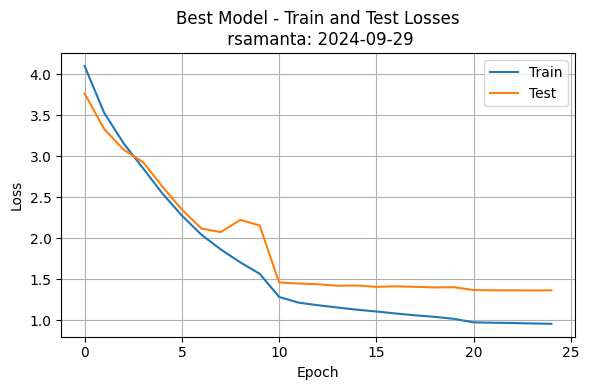

In [8]:
# Plot train and test losses
visualize.visualize_loss(train_losses, test_losses, "Best Model")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05886942..1.4558628].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26459956..1.4213084].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4487329..1.4842696].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41120023..1.362668].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3818801..1.5126765].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37228912..1.4929404].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.395

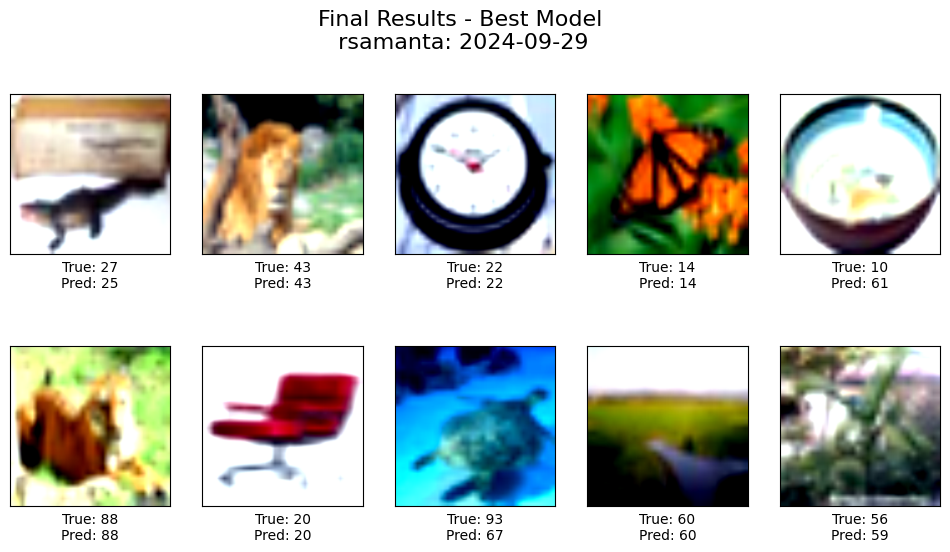

In [9]:
# Visualize the final results
visualize.visualize_images(model, testloader.dataset, device, "Best Model")